Project Task 1 - Basic Classifiers and Evaluation

1) Prepare the dataset in order to build several basic classifiers able to predict room occupancy from the available variables. You are welcome in creating new variables.

2) Solve the classification task with k-NN (testing values of k), Naive Bayes, Logistic Regression, Decision Tree using cross-validation and/or random/grid search for parameter estimation.

3) Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.

4) Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.

5) Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).

6) Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies.

7) Draw your conclusions about the basic classifiers and techniques adopted in this analysis.


In [139]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy import stats

In [140]:
df = pd.read_csv("datatraining.txt")

In [141]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [142]:
df.shape

(8143, 7)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [144]:
dates = pd.to_datetime(df['date'], infer_datetime_format=True)
df['day'] = dates.dt.day
df['hour'] = dates.dt.hour

In [145]:
daylight = []
for i in df.hour:
    if i >= 7 and i <= 17:
        daylight.append(1)
    else:
        daylight.append(0)
daylight = pd.Series(daylight)
df['daylight'] = daylight

In [146]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,daylight
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8142.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330,7.075525,11.390642,0.425203
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982,1.674896,7.092195,0.494404
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,4.000000,0.000000,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000,6.000000,5.000000,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000,7.000000,11.000000,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000,8.000000,18.000000,1.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000,10.000000,23.000000,1.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 10 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
day              8143 non-null int64
hour             8143 non-null int64
daylight         8142 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 699.8+ KB


In [174]:
# Delete attribute: "date"

df = df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy', 'day', 'hour', 'daylight']]

In [175]:
df.dropna(axis = 0, inplace = True)

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [176]:
df.reset_index(drop = True)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,daylight
0,23.18,27.2720,426.0,721.250000,0.004793,1,4,17,1.0
1,23.15,27.2675,429.5,714.000000,0.004783,1,4,17,1.0
2,23.15,27.2450,426.0,713.500000,0.004779,1,4,17,1.0
3,23.15,27.2000,426.0,708.250000,0.004772,1,4,17,1.0
4,23.10,27.2000,426.0,704.500000,0.004757,1,4,17,1.0
...,...,...,...,...,...,...,...,...,...
8137,21.05,36.0500,433.0,780.250000,0.005571,1,10,9,1.0
8138,21.05,36.0975,433.0,787.250000,0.005579,1,10,9,1.0
8139,21.05,35.9950,433.0,789.500000,0.005563,1,10,9,1.0
8140,21.10,36.0950,433.0,798.500000,0.005596,1,10,9,1.0


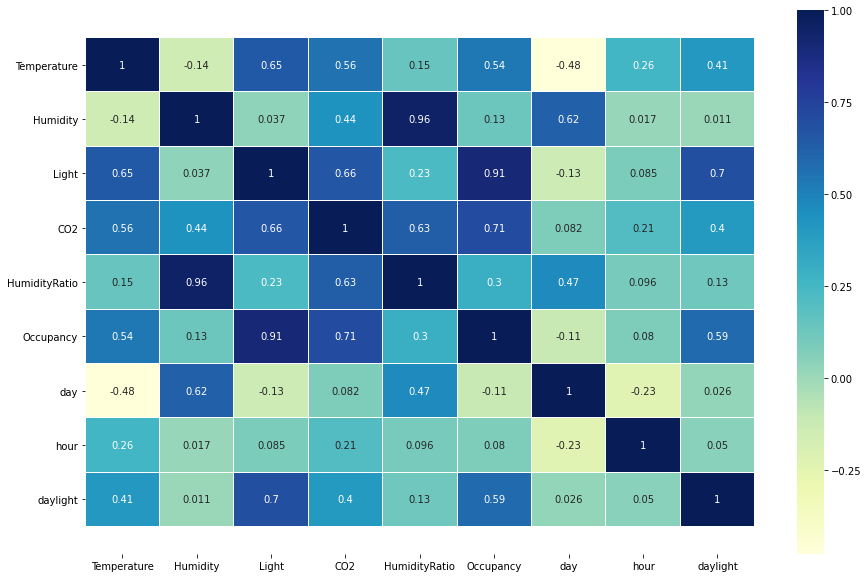

In [177]:
#Correlation Pearson (linear correlation)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot = True, linewidth=0.1, cmap='YlGnBu')
#To fix matplot error
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##
plt.show()

In [178]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [183]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

In [184]:
heat = pd.DataFrame(X)

In [186]:
heat.head()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.470533,0.275490,0.190933,0.557318,1.0,0.0,0.73913,1.0
1,0.992823,0.470332,0.277754,0.186446,0.554807,1.0,0.0,0.73913,1.0
2,0.992823,0.469326,0.275490,0.186136,0.553761,1.0,0.0,0.73913,1.0
3,0.992823,0.467315,0.275490,0.182887,0.551669,1.0,0.0,0.73913,1.0
4,0.980861,0.467315,0.275490,0.180566,0.547851,1.0,0.0,0.73913,1.0


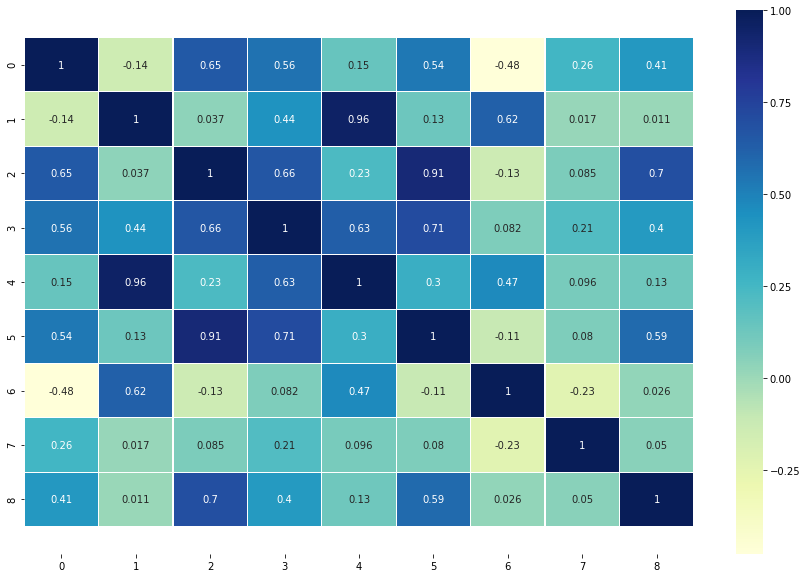

In [185]:
#Correlation Pearson (linear correlation)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(heat.corr(), annot = True, linewidth=0.1, cmap='YlGnBu')
#To fix matplot error
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##
plt.show()

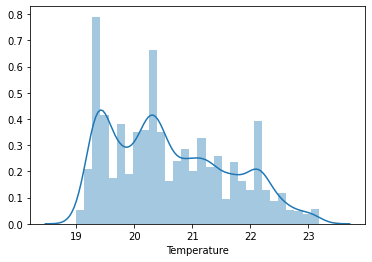

In [151]:
sns.distplot(df.Temperature, bins=30, kde=True)

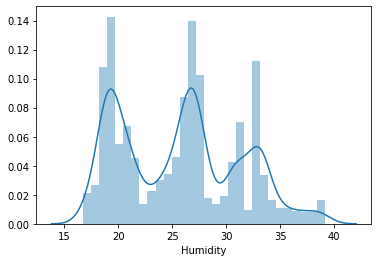

In [152]:
sns.distplot(df.Humidity, bins=30, kde=True)

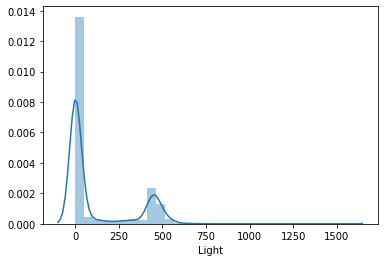

In [153]:
sns.distplot(df.Light, bins=30, kde=True)

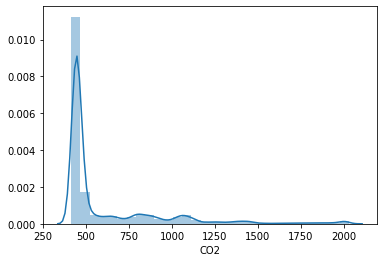

In [154]:
sns.distplot(df.CO2, bins=30, kde=True)

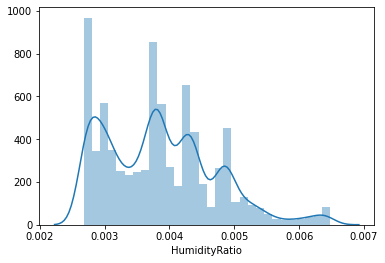

In [166]:
sns.distplot(df.HumidityRatio, bins=30, kde=True)

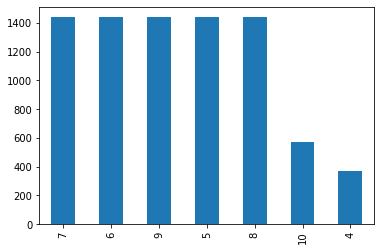

In [155]:
df.day.value_counts().plot(kind='bar')

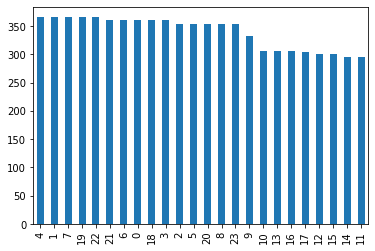

In [156]:
df.hour.value_counts().plot(kind='bar')

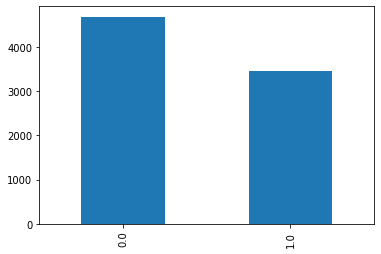

In [157]:
df.daylight.value_counts().plot(kind='bar')

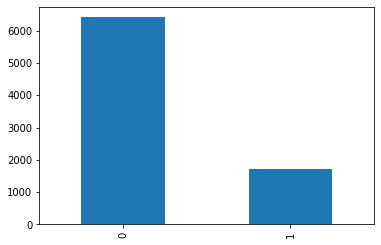

In [158]:
df.Occupancy.value_counts().plot(kind='bar')

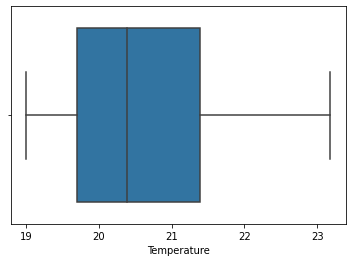

In [159]:
sns.boxplot(x = df.Temperature)

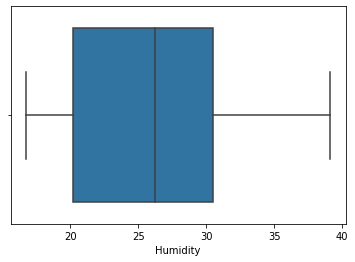

In [160]:
sns.boxplot(x = df.Humidity)

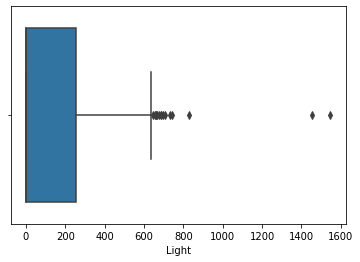

In [161]:
sns.boxplot(x = df.Light)

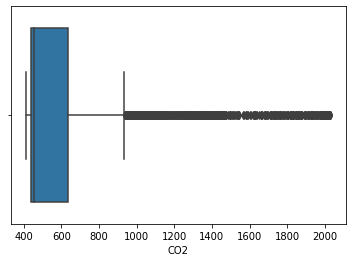

In [162]:
sns.boxplot(x = df.CO2)

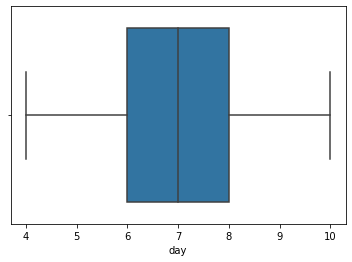

In [163]:
sns.boxplot(x = df.day)

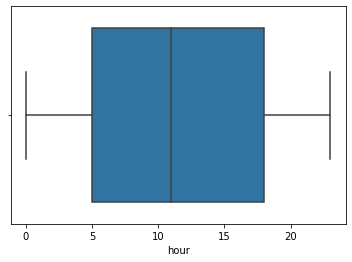

In [164]:
sns.boxplot(x = df.hour)

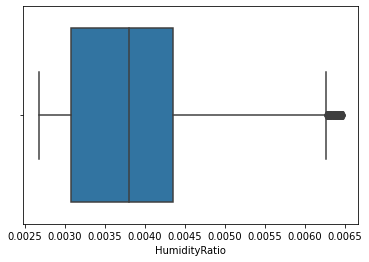

In [165]:
sns.boxplot(x = df.HumidityRatio)